# 1. Import Library

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import datetime
import numpy as np

# 2. Mempersiapkan Dataset dan Menampilkan Contoh

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


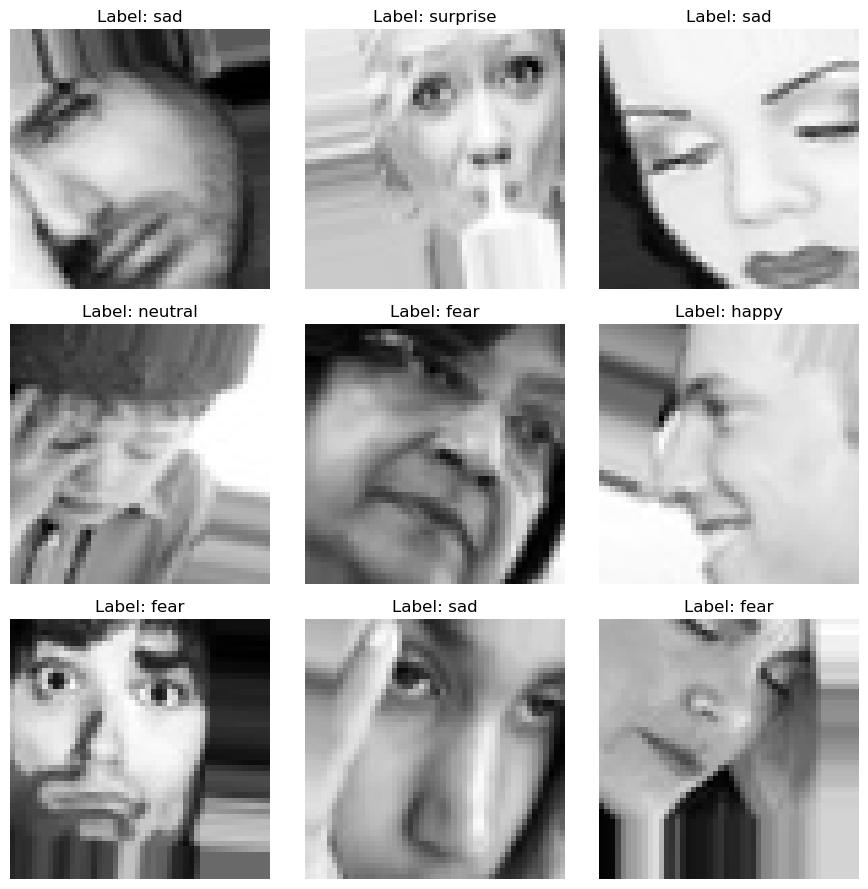

In [3]:
# Mengunduh dataset dan mempersiapkan ImageDataGenerator untuk augmentasi gambar
# Misalnya menggunakan dataset FER-2013, pastikan file sudah tersedia dalam folder 'data/train' dan 'data/validation'

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('data/train',
                                                    target_size=(48, 48),
                                                    batch_size=32,
                                                    color_mode='grayscale',
                                                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory('data/test',
                                                             target_size=(48, 48),
                                                             batch_size=32,
                                                             color_mode='grayscale',
                                                             class_mode='categorical')

# Menampilkan contoh gambar dari dataset
# Mengambil 9 contoh gambar dan label dari train_generator
sample_images, sample_labels = next(train_generator)

# Mendapatkan kelas ekspresi wajah dari train_generator
class_labels = list(train_generator.class_indices.keys())

# Menampilkan 9 gambar secara grid (3x3)
fig, axes = plt.subplots(3, 3, figsize=(9, 9))

# Loop untuk menampilkan gambar-gambar di grid
for i, ax in enumerate(axes.flat):
    # Menampilkan gambar ke (i)th subplot
    ax.imshow(sample_images[i], cmap='gray')
    
    # Menampilkan label yang sesuai (menggunakan class_labels dan sample_labels[i])
    label = class_labels[np.argmax(sample_labels[i])]  # Mengonversi label ke kelas nama ekspresi
    ax.set_title(f"Label: {label}")
    
    # Menonaktifkan axis
    ax.axis('off')

plt.tight_layout()
plt.show()

# 3. Membangun Model

In [5]:
model = Sequential([
    Input(shape=(48, 48, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')
])

# 4. Compile Model

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

# 5. Melatih Model

In [9]:
# Menyiapkan TensorBoard untuk visualisasi
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(train_generator,
                    epochs=20,
                    validation_data=validation_generator,
                    callbacks=[tensorboard_callback])

C:\Users\REDMI\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 170s 183ms/step - accuracy: 0.2511 - loss: 1.8064 - val_accuracy: 0.2983 - val_loss: 1.7139
Epoch 2/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 77s 86ms/step - accuracy: 0.2704 - loss: 1.7494 - val_accuracy: 0.3314 - val_loss: 1.6400
Epoch 3/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 73s 81ms/step - accuracy: 0.3152 - loss: 1.6909 - val_accuracy: 0.4185 - val_loss: 1.4901
Epoch 4/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 107s 120ms/step - accuracy: 0.3843 - loss: 1.5674 - val_accuracy: 0.4507 - val_loss: 1.4171
Epoch 5/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 87s 97ms/step - accuracy: 0.4453 - loss: 1.4231 - val_accuracy: 0.4928 - val_loss: 1.3152
Epoch 8/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 110s 122ms/step - accuracy: 0.5027 - loss: 1.3097 - val_accuracy: 0.5396 - val_loss: 1.2025
Epoch 13/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 86s 96ms/step - accuracy: 0.4960 - loss: 1.3131 - val_accuracy: 0.5394 - val_loss: 1.2096
Epoch 14/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 72s 80ms/step - accuracy: 0.5077 - loss: 1

# 6. Plotting Validation Accuracy/Loss

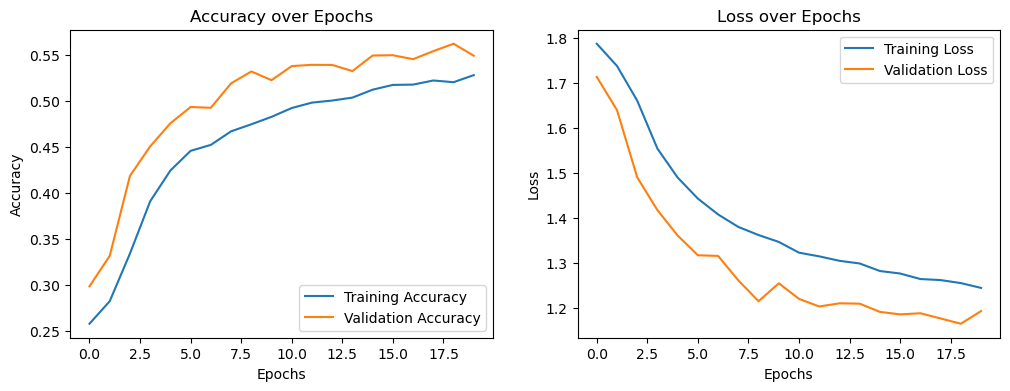

In [11]:
# Plotting akurasi dan loss selama pelatihan
plt.figure(figsize=(12, 4))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 7. Evaluasi Model

In [13]:
# Evaluasi model di data validasi
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

225/225 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - accuracy: 0.5337 - loss: 1.2405
Validation Loss: 1.1923154592514038
Validation Accuracy: 0.5494566559791565


# 8. Menyimpan Model

In [15]:
# Menyimpan model ke file .h5
model.save('emotion_recognition_model.h5')